# US Arrests Dataset

This data set contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in urban areas.

In this project, using unsupervised learning, the aim is to understand if there are any dependencies between cities and arrests data. 

Unsupervised learning is a statistical technique for exploring and discovering knowledge, from a multivariate data, without building a predictive models. It helps to visualise the relationship between variables, as well as, to identify groups of similar observations.

## 1.Exploratory Data Analysis - EDA

In [1661]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# suppressing warnings
import warnings
warnings.filterwarnings('ignore')

# machine learning libraries
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, KMeans


1.1. Loading the dataset

In [1662]:
df = pd.read_csv('UsArrests.csv') # read the dataset
df.head() # displays first 5 observations

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.200,236,58,21.200
1,Alaska,10.000,263,48,44.500
2,Arizona,8.100,294,80,31.000
3,Arkansas,8.800,190,50,19.500
4,California,9.000,276,91,40.600


1.2. Exploring the data

In [1663]:
df.shape # there are 50 rows and 5 columns

(50, 5)

In [1664]:
#To set the decimal precision:
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

#The describe function give us insight into the statistical properties of the columns
stats = df.describe()
selected_stats = stats.loc[["mean","std","min","max"]].transpose() #select relevant rows
selected_stats

,mean,std,min,max
Murder,7.79,4.36,0.80,17.40
Assault,170.76,83.34,45.00,337.00
UrbanPop,65.54,14.47,32.00,91.00
Rape,21.23,9.37,7.30,46.00


In [1665]:
df.info() # features info/types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


1.3. Missing values

In [1666]:
df.isnull().sum()
# no missing values

City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

#### 1.4. Data visualisation

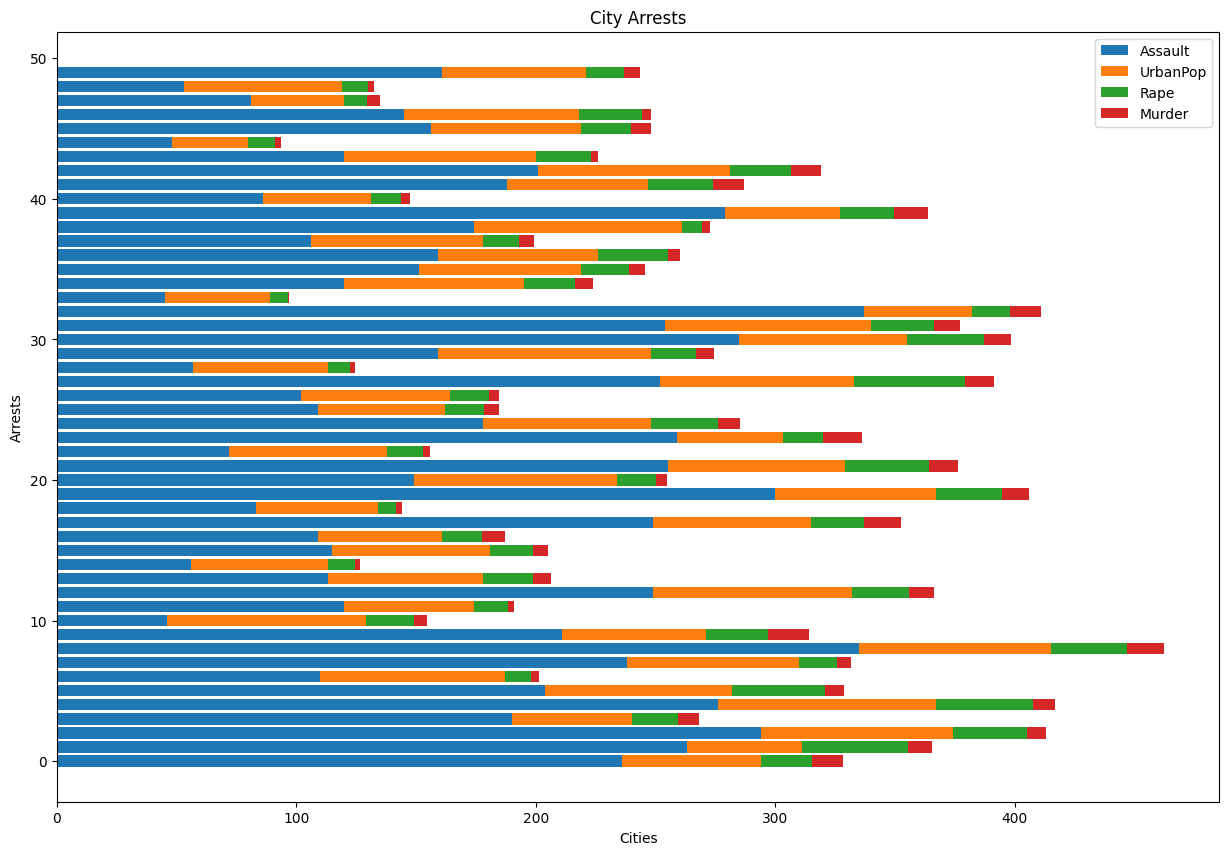

In [1667]:
# Arrests for different crimes in different Cities
x = df.index#['City']
y1 = df['Assault']
y2 = df['UrbanPop']
y3 = df['Rape']
y4 = df['Murder']

plt.figure(figsize=(15,10))
plt.barh(x, y1)
plt.barh(x, y2, left=y1)
plt.barh(x, y3, left=y1+y2)
plt.barh(x, y4, left=y1+y2+y3)
plt.xlabel('Cities')
plt.ylabel('Arrests')
plt.legend(['Assault', 'UrbanPop', 'Rape', 'Murder'])
plt.title('City Arrests')
plt.show()
# Assaults are dominating the US arrests

1.4.1. Univariate analysis

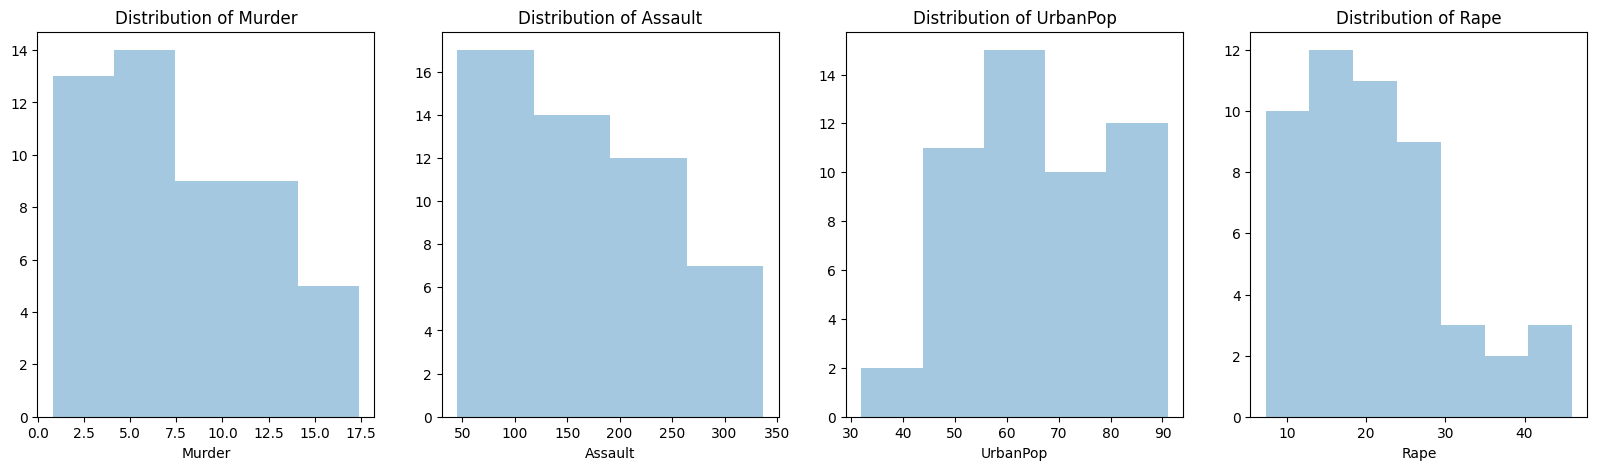

In [1668]:
# Plot individual feature
fig,axes = plt.subplots(1, 4, figsize = (20,5))
i = 0
for col in ['Murder', 'Assault', 'UrbanPop', 'Rape']:
    sns.distplot(df[col], ax = axes[i], kde = False)
    axes[i].set_title('Distribution of {}'.format(col))
    i += 1
# the number of Assault if higher than Murder and Rape
# UrbanPop count is high for 55% to 65% of the population.

1.4.2. Bivariate analysis

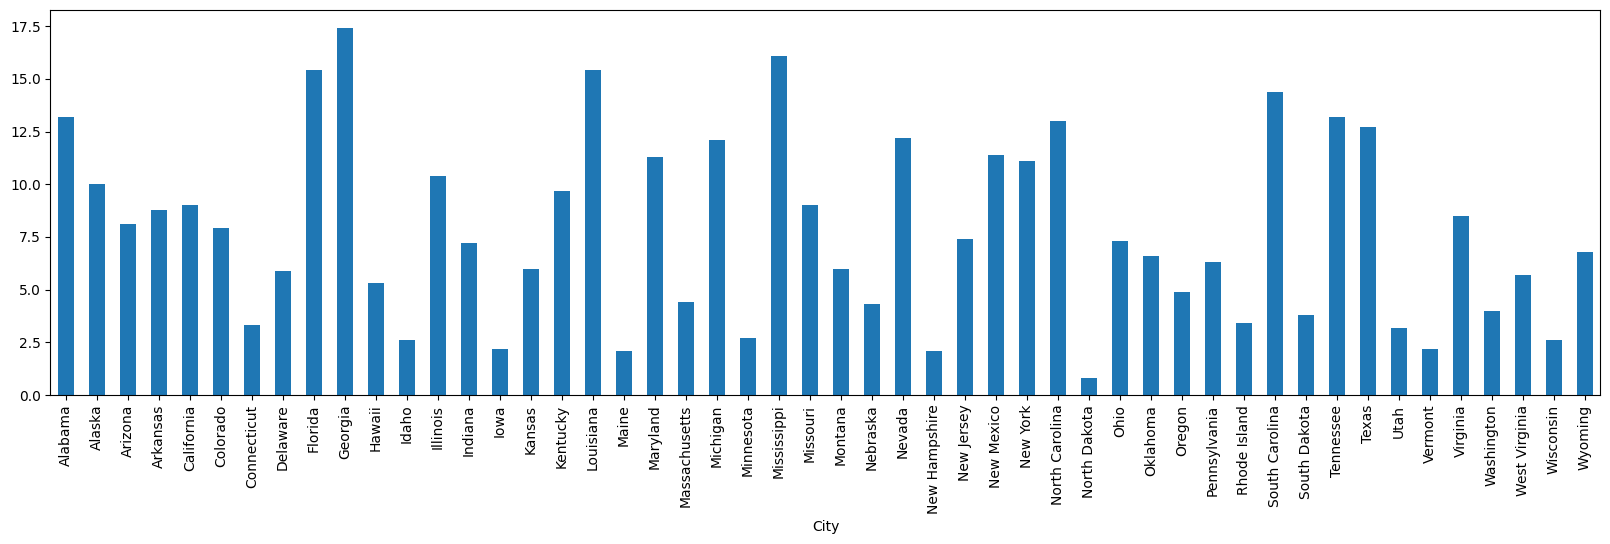

In [1669]:
# Plot Murder Rate by City
plt.figure(figsize=(20,5))
df.groupby('City')['Murder'].max().plot(kind='bar')
plt.show()

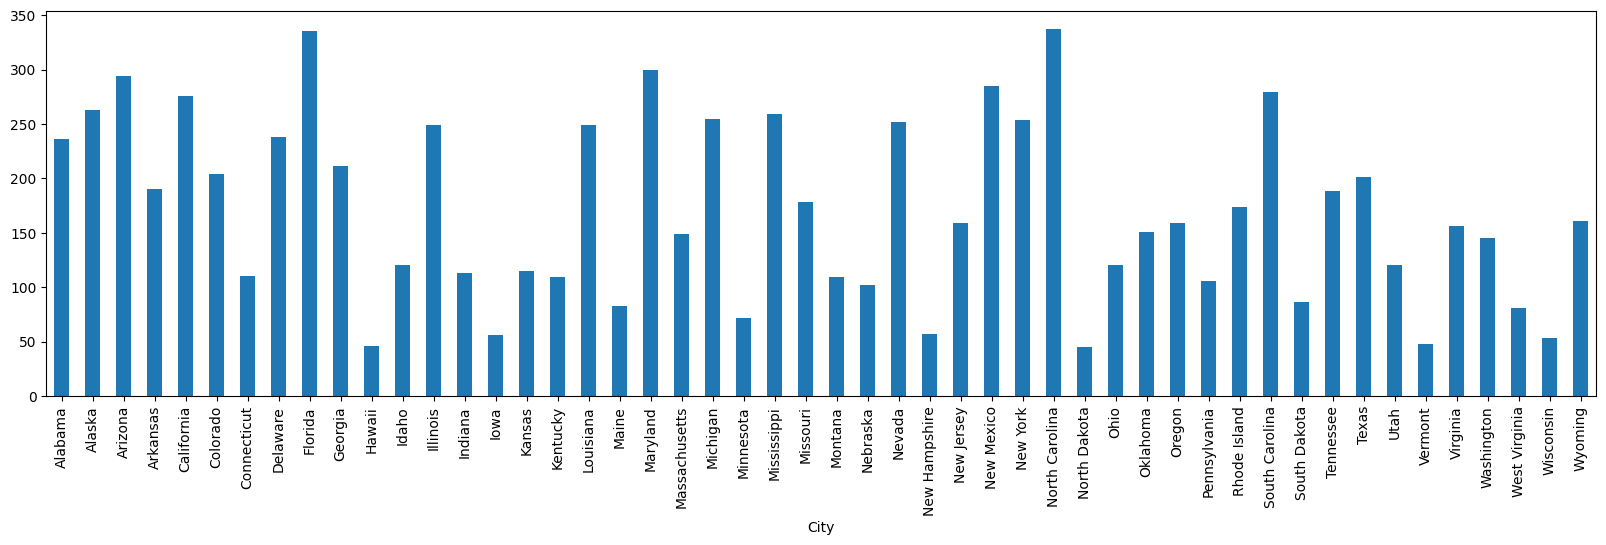

In [1670]:
# Plot Assault Rate by City
plt.figure(figsize=(20,5))
df.groupby('City')['Assault'].max().plot(kind='bar')
plt.show()

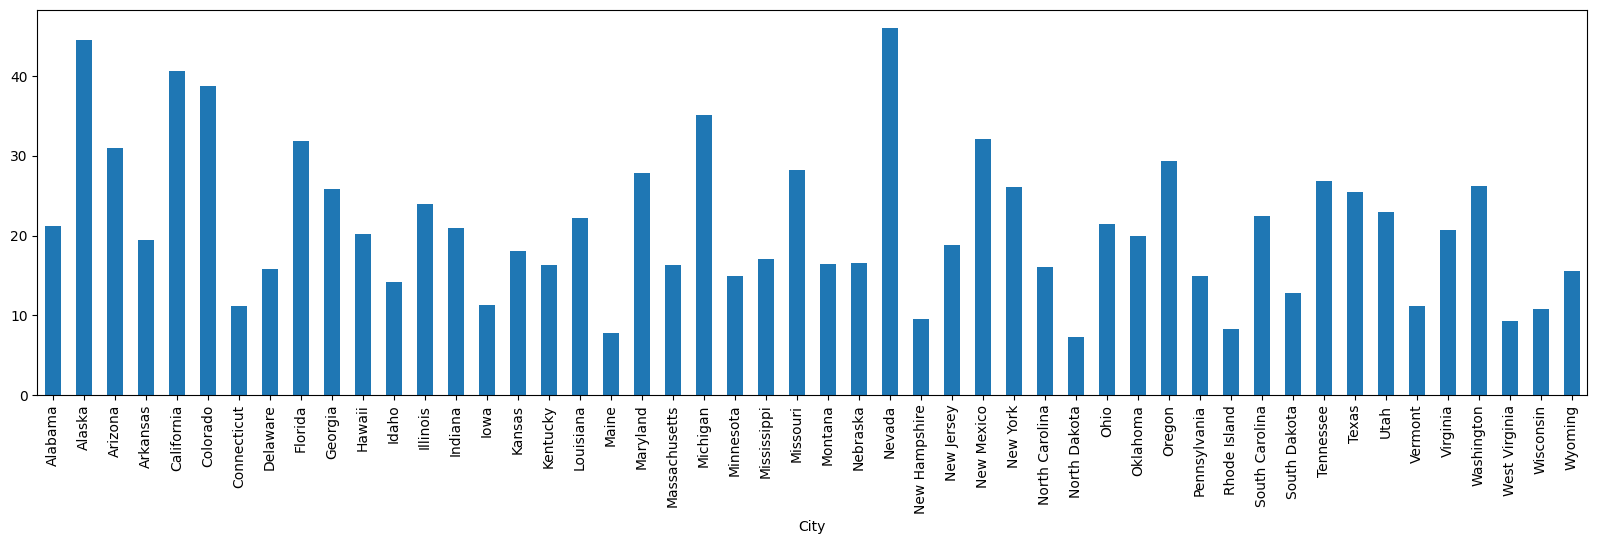

In [1671]:
# Plot Rape Rate by City
plt.figure(figsize=(20,5))
df.groupby('City')['Rape'].max().plot(kind='bar')
plt.show()

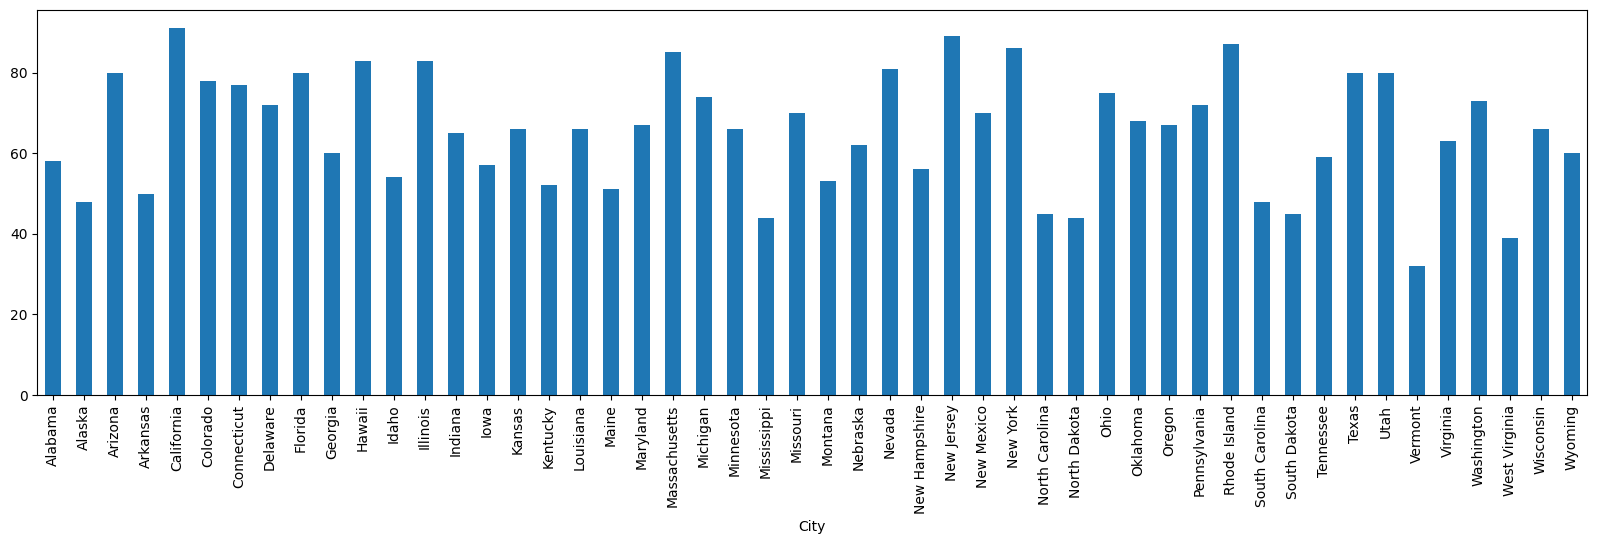

In [1672]:
# Plot UrbanPop Rate by City
plt.figure(figsize=(20,5))
df.groupby('City')['UrbanPop'].max().plot(kind='bar')
plt.show()

1.4.3. Correlation Analysis

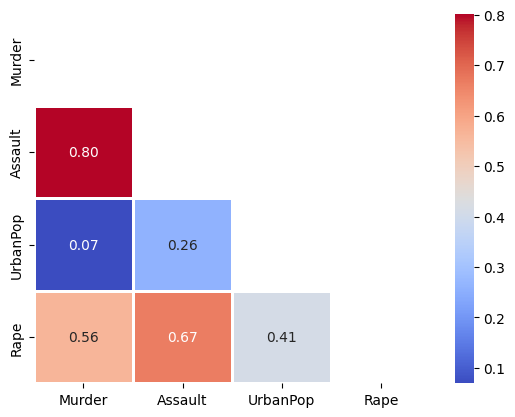

In [1673]:
cities = df['City']
corr_df = df.drop(["City"],axis=1).corr()
labels =corr_df.columns

correlations = corr_df.corr()

# plot correlations
mask_ut=np.triu(np.ones(corr_df.shape)).astype(np.bool)
ax = sns.heatmap(corr_df, annot=True, fmt=".2f", mask=mask_ut, cmap="coolwarm", linewidth=2)

plt.show()
# UrbanPop and Murder are less correlated.
# Assault, Murder and Rape rates are highly correlated.

## 2.Principal Component Analysis - PCA
Principal Component Analysis (PCA) is a statistical technique that is used to analyze the variance of a dataset and identify patterns within the data. It is often used to reduce the number of dimensions in a dataset while retaining as much information as possible.

#### 2.1. Unstandardised data

In [1674]:
np.set_printoptions(precision=2)

X = df.drop(['City'],axis=1).values.squeeze()

pca = PCA()

X_trans = pca.fit_transform(X)

df_pca = pd.DataFrame(X_trans)
df_pca.head()
# Since the determination of the principal components is based on finding the direction 
# that maximises the variance,variables with variance that are much higher than 
# the other variables tend to dominate the analysis purely due to their scale.

,0,1,2,3
0,64.80,11.45,-2.49,2.41
1,92.83,17.98,20.13,-4.09
2,124.07,-8.83,-1.69,-4.35
3,18.34,16.70,0.21,-0.52
4,107.42,-22.52,6.75,-2.81


2.1.1.Standard deviation

In [1675]:
std = df_pca.describe().transpose()['std']
print(f'Standard deviation: {std.values}')
# The low standard deviation indicates that the data points are close to the mean, 
# while a high standard deviation indicates that the data points are more spread out.

Standard deviation: [83.73 14.21  6.49  2.48]


2.1.2. Variance ratio

In [1676]:
# Check the variance of each PC
print(f"Proportion of Variance Explained: {pca.explained_variance_ratio_}")
# These values represent the proportion of the total variance in the data that can be explained 
# by the statistical model or explanatory variables. The first value, 9.66e-01, 
# indicates that the model or variables explain a large proportion of the variance in the data, 
# while the other values indicate that they explain progressively smaller amounts.

Proportion of Variance Explained: [9.66e-01 2.78e-02 5.80e-03 8.49e-04]


2.1.3. Cumulative proportion

In [1677]:
print(f"Cumulative Proportion: {np.cumsum(pca.explained_variance_)}")
# The cumulative proportion of variance explained by the series of components.

Cumulative Proportion: [7011.11 7213.11 7255.22 7261.38]


2.1.4. Biplot visualisation

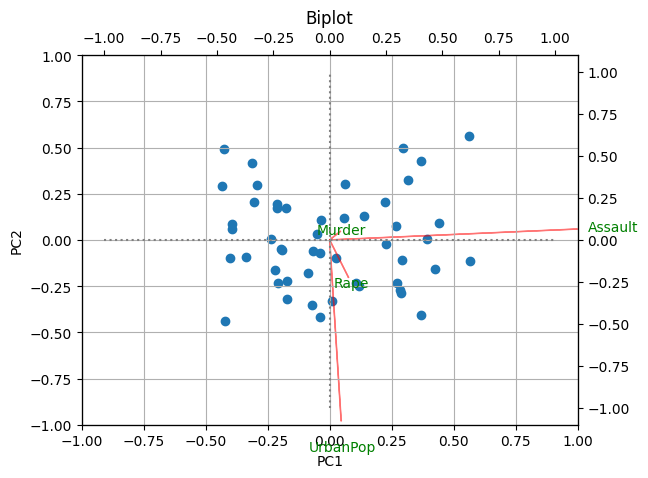

In [1678]:
# Generate biplot
def biplot(score,coeff,labels=None,points=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
   
    fig, ax = plt.subplots()    

    ax.scatter(xs * scalex,ys * scaley)

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.title('Biplot')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()
# call the function using only 2 PC
biplot(X_trans[:,0:2],np.transpose(pca.components_[0:2, :]) ,list(labels), list(cities))
ax2 = plt.twinx().twiny()
# Reference lines
ax2.hlines(0,-1,1, linestyles='dotted', colors='grey')
ax2.vlines(0,-1,1, linestyles='dotted', colors='grey')
plt.show()
plt.show()
# It seems that Assault have high correlation to PC1, while PC2 corresponds to UrbanPop. 
# More analysis to be done after standardising the data

2.1.5. Features importance

In [1679]:
# Feature importance
pd.set_option('display.float_format', lambda x: '%.3f' % x) #change precision to see more decimal places

pc1 = abs( pca.components_[0] ) # components x features - access at index 0 to get the first component
pc2 = abs( pca.components_[1] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df
# The values in the PC1 Importance column indicate that the "Assault" feature is the most important in the first principal component, 
# while the UrbanPop feature is the most important in the second principal component. 
# The other features, Murder and Rape have lower importance in both principal components.

,Features,PC1 Importance,PC2 Importance
0,Murder,0.042,0.045
1,Assault,0.995,0.059
2,UrbanPop,0.046,0.977
3,Rape,0.075,0.201


#### 2.2. Standardised data

In [1680]:
# Standardise the data
X_std = StandardScaler().fit_transform(X)

# Assign PCA
std_pca = PCA()
X_std_trans = std_pca.fit_transform(X_std)

df_std_pca = pd.DataFrame(X_std_trans)
df_std_pca.head()

,0,1,2,3
0,0.986,1.133,-0.444,0.156
1,1.950,1.073,2.040,-0.439
2,1.763,-0.746,0.055,-0.835
3,-0.141,1.120,0.115,-0.183
4,2.524,-1.543,0.599,-0.342


2.2.1. Biplot visualisation

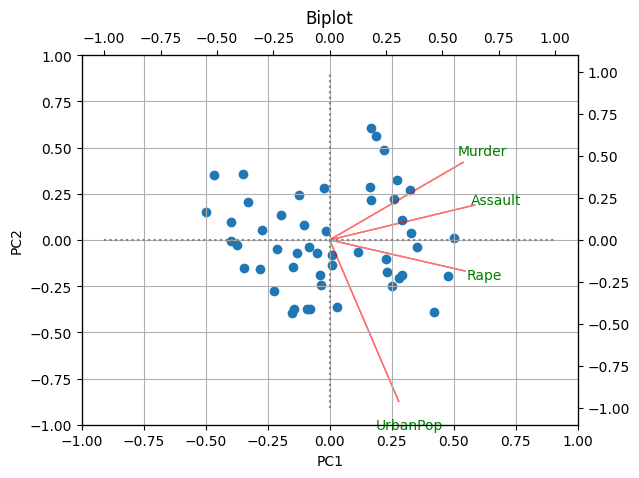

In [1681]:
biplot(X_std_trans[:,0:2],np.transpose(std_pca.components_[0:2, :]),list(labels), list(cities))
ax2 = plt.twinx().twiny()
# Reference lines
ax2.hlines(0,-1,1, linestyles='dotted', colors='grey')
ax2.vlines(0,-1,1, linestyles='dotted', colors='grey')
plt.show()
plt.show()
# It can be observed that Murder, Assault, and Rape are close to each other. 
# UrbanPop variable is far from the crime arrests variables. Also, this indicates that the crime-related variables 
# are correlated with each other and that the UrbanPop variable is less correlated with the other three.
# Cities with high Murder rates tend to have high Assault and Rape rates.
# Cities close to zero on both components have approximately average levels of both crime and urbanization.


2.2.2. Feature importance

In [1682]:
# Feature importance
pc1 = abs( std_pca.components_[0] ) #components x features - access at index 0 to get the first component
pc2 = abs( std_pca.components_[1] )
pc3 = abs( std_pca.components_[2] )
pc4 = abs( std_pca.components_[3] )

# Assign variables
feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df["PC3 Importance"] = pc3
feat_df["PC4 Importance"] = pc4
feat_df

,Features,PC1 Importance,PC2 Importance,PC3 Importance,PC4 Importance
0,Murder,0.536,0.418,0.341,0.649
1,Assault,0.583,0.188,0.268,0.743
2,UrbanPop,0.278,0.873,0.378,0.134
3,Rape,0.543,0.167,0.818,0.089


2.2.3. Cumulative variance

Text(0.5, 1.0, 'Cumulative Explained Variance')

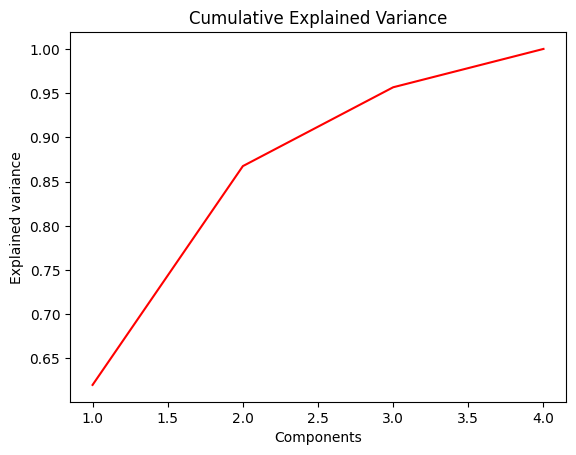

In [1683]:
# Cumulative variance plot
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(std_pca.explained_variance_ratio_ )+1),
         np.cumsum(std_pca.explained_variance_ratio_), c='red')
plt.title("Cumulative Explained Variance")

2.2.4. Scree plot

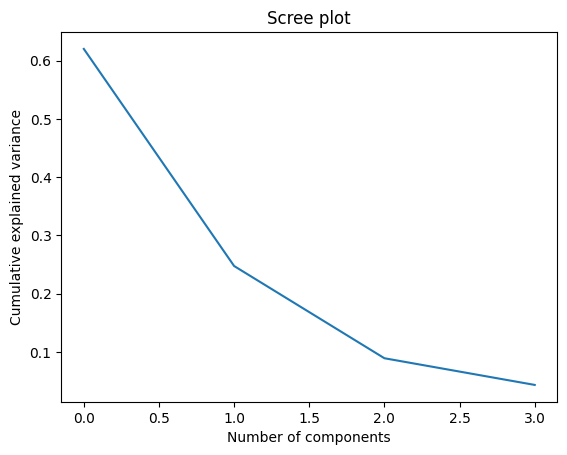

In [1684]:
# Scree plot
plt.plot(std_pca.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title("Scree plot")
plt.show()

2.2.5. Insights
- The first 2 principal components together explain around 90% of the variance. We can therefore use them to perform cluster analysis. This is what we refer to as dimensionality reduction. We began with 4 variables and now we have 2 variables explaining most of the variability. 

## 3.Cluster Analysis

In [1685]:
# Select the first 2 components in PCA
df_std_pca = pd.DataFrame(X_std_trans[:,0:2], index=df.index)
df_std_pca.head()

,0,1
0,0.986,1.133
1,1.950,1.073
2,1.763,-0.746
3,-0.141,1.120
4,2.524,-1.543


3.1. Hierarchical Clustering Dendogram

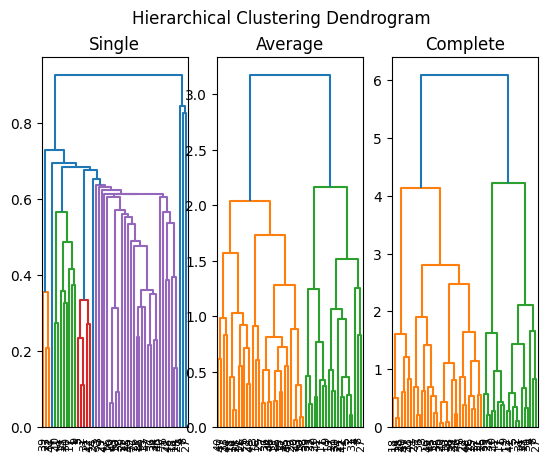

In [1686]:
# Plot dendograms for different linkage methods
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Hierarchical Clustering Dendrogram')
ax1.set_title("Single")
dendrogram(linkage(df_std_pca, method='single'), labels=df_std_pca.index, ax=ax1) # single linkage
ax2.set_title("Average")
dendrogram(linkage(df_std_pca, method='average'), labels=df_std_pca.index, ax=ax2) # average linkage
ax3.set_title("Complete")
dendrogram(linkage(df_std_pca, method='complete'), labels=df_std_pca.index, ax=ax3) # complete linkage
plt.show()
# the highest variance is obtained by the complete linkage

3.2. Complete Linkage Dendogram 

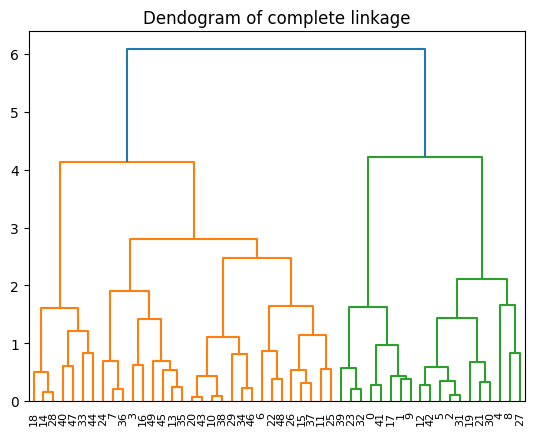

In [1687]:
# Visualising the clusters in more details
plt.title("Dendogram of complete linkage")
dendrogram(linkage(df_std_pca, method='complete'), labels=df_std_pca.index)
plt.show()
# The hierarchical clustering using the complete method splits the PCA data 
# into 4 distinct groups if taken at the level L=3. 
# It can be further visualised in a scatter plot.

3.3. K-Means

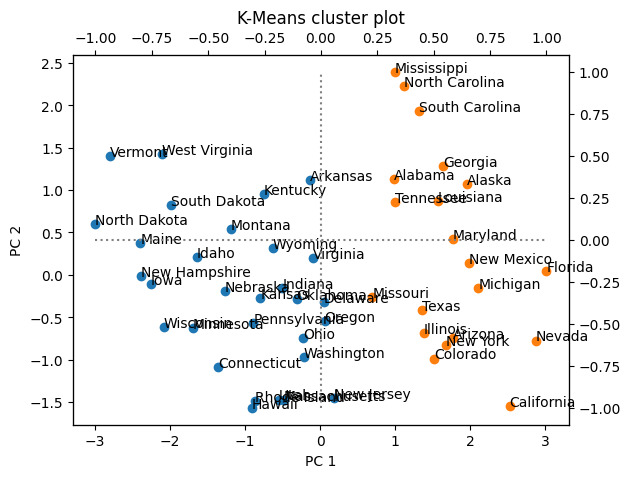

In [1688]:
# Extract the first two components
x = X_std_trans[:,0]
y = X_std_trans[:,1]

# Fit k-means
k=2
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(df_std_pca)
cent = kmeans.cluster_centers_

# Plot clusters
fig, ax = plt.subplots()

for i in range(0,k):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i]) 

for i in range(0,len(x)):
        txt = cities[i]
        ax.annotate(txt, (x[i], y[i]))
ax.set_title("K-Means cluster plot")
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax2 = plt.twinx().twiny()
# Reference lines
ax2.hlines(0,-1,1, linestyles='dotted', colors='grey')
ax2.vlines(0,-1,1, linestyles='dotted', colors='grey')
plt.show()
# Knowing that PC2 was dominated by the UrbanPop and PC1 was dominated by Assault, 
# it can be concluded that the clusters are based on urbanisation.

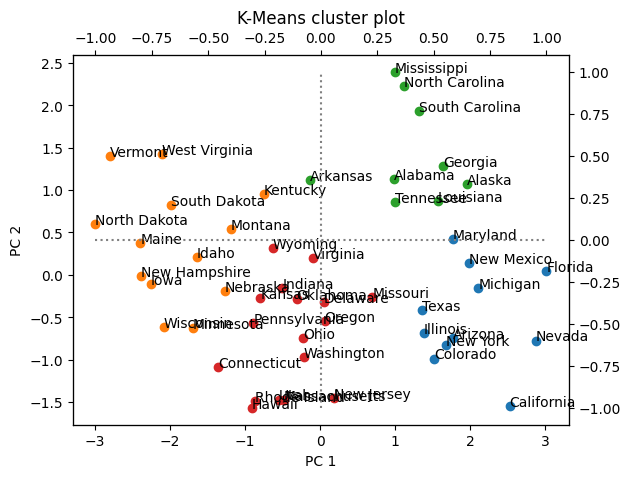

In [1689]:
# Extract the first two components
x = X_std_trans[:,0]
y = X_std_trans[:,1]

# Fit k-means
k=4
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(df_std_pca)
cent = kmeans.cluster_centers_

# Plot clusters
fig, ax = plt.subplots()

for i in range(0,k):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i]) 

for i in range(0,len(x)):
        txt = cities[i]
        ax.annotate(txt, (x[i], y[i]))
ax.set_title("K-Means cluster plot")
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax2 = plt.twinx().twiny()
# Reference lines
ax2.hlines(0,-1,1, linestyles='dotted', colors='grey')
ax2.vlines(0,-1,1, linestyles='dotted', colors='grey')
plt.show()
# The 4 groups represent low population / low crime (orange), average population / low crime (red), 
# high population / high crime (green), and high population / low crime (blue).


## 4.Conclusion
This cluster analysis has helped us to categorize cities level of danger as well as identify a relationship between city size and general violent crime.

In this analysis of US Arrests dataset done with Unsupervised Learning using Principal Component Analysis, K-Means Clustering and Hierarchical Clustering, we can conclude that Mississippi, North Carolina, South Carolina have high Urban Population and high Crime rates. Whereas states like North Dakota, South Dakota, Vermont have low Urban Population and low Crime rates.